## Problem Statement
#### The objective of this assignment is to utilize XGBoost classification modeling techniques with hyper-parameter tuning to predict target classes ( " diagnosis" ) based on historical data. By exploring the datasets and employing XGBoost classification to generate accurate predictions and evaluate the model's performance.

In [2]:
# for structured data manupulation, data exploration 
import pandas as pd

# for numerical computin in python
import numpy as np

# for data visulisation and graph ploting 
import matplotlib.pyplot as plt

# for  scatter plots, heatmaps, distribution plots
import seaborn as sns

# for spliting data in train and test 
from sklearn.model_selection import train_test_split

# for ploting the data in decision tree import decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# for data preprocessing 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from xgboost import XGBClassifier

# for Model Hyper Parameter tuning 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import RandomizedSearchCV

#  Evaluation of test data.
from sklearn.metrics import accuracy_score

#### Load the dataset for classification analysis

In [3]:
df = pd.read_csv('Assignmet _Data/Breast Cancer Wisconsin (Diagnostic) Data Set.csv', index_col=0)
df.sample(10).T

id,84348301,884626,8712729,861598,857637,8911670,8812844,916221,9010877,8510426
diagnosis,M,B,M,B,M,M,B,B,B,B
radius_mean,11.42,12.89,16.78,14.64,19.21,18.81,10.18,11.34,13.4,13.54
texture_mean,20.38,14.11,18.8,15.24,18.57,19.98,17.53,18.61,16.95,14.36
perimeter_mean,77.58,84.95,109.3,95.77,125.5,120.9,65.12,72.76,85.48,87.46
area_mean,386.1,512.2,886.3,651.9,1152.0,1102.0,313.1,391.2,552.4,566.3
smoothness_mean,0.1425,0.0876,0.08865,0.1132,0.1053,0.08923,0.1061,0.1049,0.07937,0.09779
compactness_mean,0.2839,0.1346,0.09182,0.1339,0.1267,0.05884,0.08502,0.08499,0.05696,0.08129
concavity_mean,0.2414,0.1374,0.08422,0.09966,0.1323,0.0802,0.01768,0.04302,0.02181,0.06664
concave points_mean,0.1052,0.0398,0.06576,0.07064,0.08994,0.05843,0.01915,0.02594,0.01473,0.04781
symmetry_mean,0.2597,0.1596,0.1893,0.2116,0.1917,0.155,0.191,0.1927,0.165,0.1885


### Data Content

#### 1) ID number
#### 2) Diagnosis (M = malignant, B = benign)
#### 3) radius (mean of distances from center to points on the perimeter)
#### 4) texture (standard deviation of gray-scale values)
#### 5) perimeter
#### 6) area
#### 7) smoothness (local variation in radius lengths)
#### 8) compactness (perimeter^2 / area - 1.0)
#### 9) concavity (severity of concave portions of the contour)
#### 10) concave points (number of concave portions of the contour)
#### 11) symmetry
#### 12) fractal dimension ("coastline approximation" - 1)
#### 13) The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
#### 14) All feature values are recoded with four significant digits.
#### 15) Missing attribute values: none
#### 16) Class distribution: 357 benign, 212 malignant

In [4]:
df.info()  ## Bassic information of the features od the data sets..

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df.shape

(569, 32)

#### Before preprocess the data further there are few observation :
##### 1) ID has no variance & Unamed: 32 is a Null feature, which is not contibuting to this data for prediction. Hence dropp these feature columns.
#####  2) Diagnosis is a depndent feature , Then split the data with dependend and independend features.

In [7]:
# Drop 'Name' and 'Ticket' columns from df_combined
df= df.drop(columns=['Unnamed: 32'])

In [8]:
df_x = df.iloc[:,1:30]
df_y = df.iloc[:,:1]

# Display the shapes of the resulting DataFrames
print("Independend Data set Shape:", df_x.shape)
print("Dependend Data set Shape:", df_y.shape)

Independend Data set Shape: (569, 29)
Dependend Data set Shape: (569, 1)


In [9]:
# Reset index for df_x
df_x.reset_index(drop=True, inplace=True)

# Reset index for df_y
df_y.reset_index(drop=True, inplace=True)

In [10]:
df_x.head().T

,0,1,2,3,4
radius_mean,17.990000,20.570000,19.690000,11.420000,20.290000
texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000
perimeter_mean,122.800000,132.900000,130.000000,77.580000,135.100000
area_mean,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
smoothness_mean,0.118400,0.084740,0.109600,0.142500,0.100300
compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800
concavity_mean,0.300100,0.086900,0.197400,0.241400,0.198000
concave points_mean,0.147100,0.070170,0.127900,0.105200,0.104300
symmetry_mean,0.241900,0.181200,0.206900,0.259700,0.180900
fractal_dimension_mean,0.078710,0.056670,0.059990,0.097440,0.058830


In [11]:
df_y.head().T

,0,1,2,3,4
diagnosis,M,M,M,M,M


In [12]:
B, M = df_y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Number of Benign:  357
Number of Malignant :  212


In [13]:
from sklearn.preprocessing import LabelEncoder

# df_y is a DataFrame and 'diagnosis' is a catagorical column in the DataFrame, Hence we encode the catagorical variable to intiger 0 & 1.
label_encoder = LabelEncoder()
df_y.loc[:, 'diagnosis'] = label_encoder.fit_transform(df_y['diagnosis'])

In [14]:
df_y.value_counts()

diagnosis
0            357
1            212
Name: count, dtype: int64

In [15]:
df_y = df_y.astype(int)

In [16]:
print(df_y['diagnosis'].unique())

[1 0]


## Useing RandomForest Classifer here we do feature reduction and select the the best feature which have high information gain to theoutput variables

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [18]:
# Assuming df_x and df_y are your feature and target DataFrames
sel = SelectFromModel(RandomForestClassifier(n_estimators=200, max_features=29, random_state=17))
sel.fit(df_x, df_y.values.ravel())  # Ensure y is a 1D array using .values.ravel()


SelectFromModel(estimator=RandomForestClassifier(max_features=29,
                                                 n_estimators=200,
                                                 random_state=17))

In [19]:
sel.get_support()  # to find the best feature i.e. true..

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False])

In [20]:
selected_feat= df_x.columns[(sel.get_support())]
len(selected_feat)

5

In [21]:
selected_feat

Index(['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

In [22]:
# Create a new DataFrame with only the selected features
df_x = df_x[selected_feat]

In [23]:
df_x

,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,0.14710,25.380,184.60,2019.0,0.2654
1,0.07017,24.990,158.80,1956.0,0.1860
2,0.12790,23.570,152.50,1709.0,0.2430
3,0.10520,14.910,98.87,567.7,0.2575
4,0.10430,22.540,152.20,1575.0,0.1625
...,...,...,...,...,...
564,0.13890,25.450,166.10,2027.0,0.2216
565,0.09791,23.690,155.00,1731.0,0.1628
566,0.05302,18.980,126.70,1124.0,0.1418
567,0.15200,25.740,184.60,1821.0,0.2650


### Model Building and Hyper-Parameter Tuning

    Split the dataset into training and testing sets.
    Initialize an XGBoost classifier model.
    Tune hyper-parameters using techniques like grid search or random search.
    Utilize cross-validation for robust parameter selection.



In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train Shape:", x1_train.shape)
print("X_test Shape:", x1_test.shape)
print("y_train Shape:", y1_train.shape)
print("y_test Shape:", y1_test.shape)


X_train Shape: (455, 5)
X_test Shape: (114, 5)
y_train Shape: (455, 1)
y_test Shape: (114, 1)


In [25]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [26]:
# Define the XGBoost classifier
xgb_model = XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Let’s look at the overview of the most frequently tuned hyperparameters:

    learning_rate: also called eta, it specifies how quickly the model fits the residual errors by using additional base learners.(typical values: 0.01–0.2 )

    gamma, reg_alpha, reg_lambda: these 3 parameters specify the values for 3 types of regularization done by XGBoost - minimum loss reduction to create a new split, L1 reg on leaf weights, L2 reg leaf weights respectively

    typical values for gamma: 0 - 0.5 but highly dependent on the data typical values for reg_alpha and reg_lambda: 0 - 1 is a good starting point but again, depends on the data

    max_depth - how deep the tree's decision nodes can go. Must be a positive integer, typical values: 1–10

    subsample - fraction of the training set that can be used to train each tree. If this value is low, it may lead to underfitting or if it is too high, it may lead to overfitting , typical values: 0.5–0.9

    colsample_bytree- fraction of the features that can be used to train each tree. A large value means almost all features can be used to build the decision tree , typical values: 0.5–0.9

The above are the main hyperparameters people often tune.


In [27]:
# Define the hyperparameter grid to search
param = {
    'learning_rate': [0.1 , 0.2],
    'n_estimators': [50, 100],
    'max_depth': [5, 10],  # Adjusted based on typical values
    'subsample': [0.5, 0.9],  # Adjusted based on typical values
    'colsample_bytree': [0.5, 0.6],  # Adjusted based on typical values
    'gamma': [0.2, 0.3 ],  # Adjusted based on typical values
    'reg_alpha': [0, 0.5],  # Adjusted based on typical values
    'reg_lambda': [0.5 , 1 ],  # Adjusted based on typical values
}

In [28]:
grid_search = GridSearchCV(
    xgb_model,
    param_grid=param,
    scoring='accuracy',  # Use an appropriate scoring metric for your problem
    cv=5,  # Number of cross-validation folds
    verbose=2,
    n_jobs=-1,  # Use -1 to use all available CPU cores
)

In [29]:
# Fit the grid search to the data
grid_search.fit(x1_train, y1_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.5, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.5, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.5; total time=   0.1s
[CV] END colsa

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.6], 'gamma': [0.2, 0.3],
                         'learning_rate': [0.1, 0.2], 'max_depth': [5, 10],
                         'n_estimators': [50, 100], 'reg_alpha': [0, 0.5],
                         'reg_lambda': [0.5, 1], 'subsample': [0.5, 0.9]},
             scoring='accuracy', verbose=2)

In [30]:
# Get the best hyperparameters
best_params1 = grid_search.best_params_
print("Best Hyperparameters:", best_params1)

Best Hyperparameters: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'reg_alpha': 0.5, 'reg_lambda': 1, 'subsample': 0.9}


In [31]:
# Evaluate the model with the best hyperparameters on the test set
best_model1 = grid_search.best_estimator_

In [32]:
y_pred1 = best_model1.predict(x1_test)

### Model Training and Evaluation

    Train the model using the training set with the tuned hyper-parameters.
    Evaluate the model's performance using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
    Visualize evaluation metrics and ROC curve.



In [33]:
Gcv_accuracy = accuracy_score(y1_test, y_pred1)*100
print("Test Accuracy:", Gcv_accuracy)

Test Accuracy: 95.6140350877193


In [34]:
# Making predictions on the test data
pd.Series(y_pred1).value_counts()

0    72
1    42
Name: count, dtype: int64

In [35]:
pd.crosstab(y1_test.values.ravel(),y_pred1)

col_0,0,1
row_0,,
0,69,2
1,3,40


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

In [37]:
# Predictions on the test set
y_pred2 = best_model1.predict(x1_test)
y_proba = best_model1.predict_proba(x1_test)[:, 1]

In [38]:
# Evaluate the model's performance

precision = precision_score(y1_test, y_pred2)
recall = recall_score(y1_test, y_pred2)
f1 = f1_score(y1_test, y_pred2)
roc_auc = roc_auc_score(y1_test, y_proba)

In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y1_test, y_pred2)

print("Precision:", precision)

print("Recall:", recall)

print("F1 Score:", f1)

print("ROC AUC Score:", roc_auc)

print("Confusion Matrix:")

print(conf_matrix)

Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1 Score: 0.9411764705882352
ROC AUC Score: 0.9895185063871602
Confusion Matrix:
[[69  2]
 [ 3 40]]


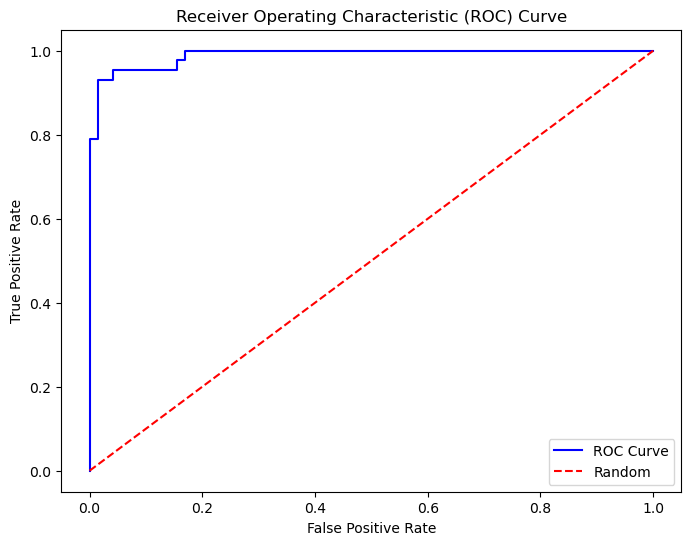

[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.5; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth

In [40]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y1_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Henece we found the Model is 96% accurqte on diagnosisi prediction..¶